# Kaggle Competition: Titanic problem


## 1、数据预处理 

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
# 导入训练数据和测试数据
data_test = pd.read_csv('F:\Python\data\\Titanic_data\\test.csv')
data_train = pd.read_csv('F:\Python\data\\Titanic_data\\train.csv')

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上面的数据展示可以看出，整个训练集中的乘客数为891，数据列中“Age”、“Cabin”列的数据有缺失

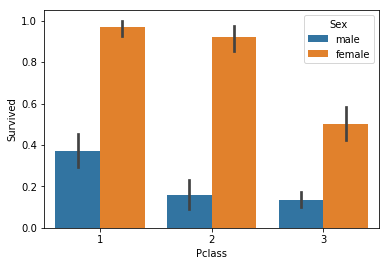

In [210]:
# 对各属性列进行分析
import seaborn as sns
# 乘客等级属性列与存活率关系
sns.barplot(x='Pclass',y='Survived',hue ="Sex",data = data_train)

乘客等级中可以看到，男士的存活率比女士存活率都低，这与西方绅士精神有关，女士、老人、小孩优先；另一方面，高等级的乘客比低等级的乘客存活率高

In [211]:
# 性别属性列
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

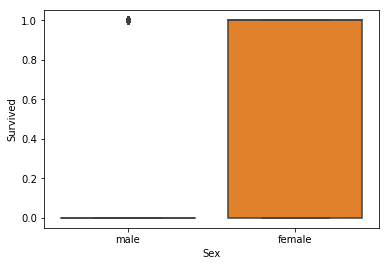

In [212]:
sns.boxplot(x='Sex',y='Survived',data=data_train)

从上图可以知道，女士存活率远远高于男士

In [213]:
# 年龄属性列
data_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [214]:
data_train.Age = data_train.Age.fillna(-1)
data_test.Age = data_test.Age.fillna(-1)

年龄为连续值，可以对其进行离散化处理，分成几个年龄区间

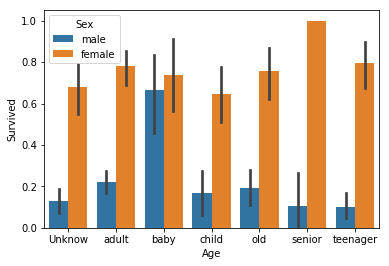

In [215]:
# 对年龄离散化进行处理
def age_cleaned(df):
    bins = (-2,0,6,18,24,40,60,120)
    groups = ['Unknow','baby','child','teenager','adult','old','senior']
    df.Age= pd.cut(df.Age,bins,labels = groups)
    return df

data_train = age_cleaned(data_train)
data_test = age_cleaned(data_test)
sns.barplot(x='Age',y='Survived',hue='Sex',data=data_train)

In [216]:
data_train.Age.value_counts()

adult       287
Unknow      177
teenager    138
old         128
child        92
baby         47
senior       22
Name: Age, dtype: int64

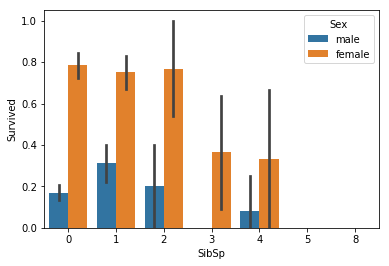

In [217]:
# 兄弟姐妹个数属性列与存活率关系
sns.barplot(x='SibSp',y='Survived',hue ="Sex",data = data_train)

拥有0-2个兄弟姐妹的乘客的存活率比较高；拥有3个兄弟姐妹的男士存活率几乎为0，将其加到特征集中

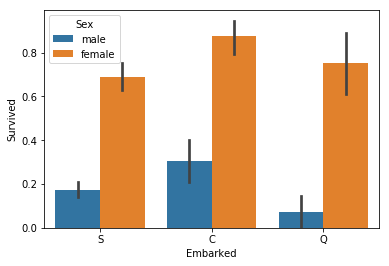

In [218]:
# 登船港口属性列与存活率关系
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data_train)

在C港口的登船的乘客存活率比其他两个港口的存活率高，将其加入特征集中

In [219]:
# 客舱等级
data_train.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

cabin只有204个值有参数，其他值均缺失，且有cabin值得属性都有字母，可以查看有无cabin值的乘客存活率情况

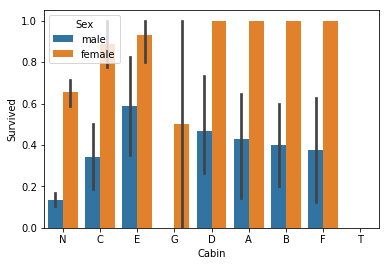

In [220]:
# 对cabin属性列进行处理
def cabin_cleaned(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df
    
data_train = cabin_cleaned(data_train)
data_test = cabin_cleaned(data_test)

sns.barplot(x='Cabin',y='Survived',hue='Sex',data=data_train)

有客舱等级比无客舱等级的数值存活率高，可以将其加到特征中

In [221]:
# 乘客名字属性与存活率之间的关系
data_train.Name.value_counts()

McCoy, Mr. Bernard                                                     1
Hagland, Mr. Ingvald Olai Olsen                                        1
Karun, Miss. Manca                                                     1
Douglas, Mr. Walter Donald                                             1
de Messemaeker, Mrs. Guillaume Joseph (Emma)                           1
Vander Cruyssen, Mr. Victor                                            1
McKane, Mr. Peter David                                                1
Lurette, Miss. Elise                                                   1
Klasen, Mr. Klas Albin                                                 1
Arnold-Franchi, Mrs. Josef (Josefine Franchi)                          1
Peuchen, Major. Arthur Godfrey                                         1
Allen, Mr. William Henry                                               1
Calic, Mr. Petar                                                       1
Moor, Master. Meier                                

名字的抬头属性可以判断乘客的性别和乘客的大致年龄，将其加入特征集中

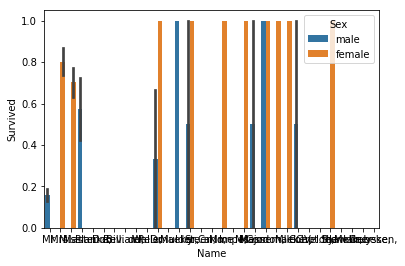

In [222]:
def name_cleaned(df):
    df.Name = df.Name.apply(lambda x: x.split(" ")[1])
    return df

data_train = name_cleaned(data_train)
data_test = name_cleaned(data_test)
sns.barplot(x='Name',y='Survived',hue='Sex',data=data_train)

In [223]:
data_train.Name.value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Col.              2
Gordon,           2
Major.            2
Mlle.             2
Melkebeke,        1
Billiard,         1
Pelsmaeker,       1
Walle,            1
Ms.               1
Jonkheer.         1
Messemaeker,      1
Steen,            1
Cruyssen,         1
Velde,            1
Mme.              1
Carlo,            1
Shawah,           1
Don.              1
der               1
Mulder,           1
Capt.             1
the               1
Name: Name, dtype: int64

In [224]:
# 家庭成员个数与存活率关系
data_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

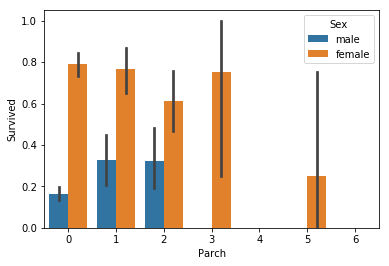

In [225]:
sns.barplot(x='Parch',y='Survived',hue='Sex',data=data_train)

家庭成员的个数对存活率有关，家庭成员个数小，存活率高

In [226]:
# 票价与存活率关系
data_train.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [227]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

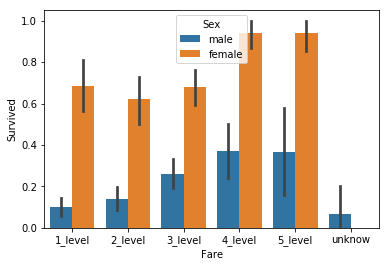

In [228]:
# 票价是一个连续值，将其离散化，分为5档
def fare_cleaned(df):
    df.Fare = df.Fare.fillna(-1)
    bins = (-2,0,8,15,50,100,600)
    groups = ['unknow','1_level','2_level','3_level','4_level','5_level']
    df.Fare = pd.cut(df.Fare,bins,labels=groups)
    return df

data_train = fare_cleaned(data_train)
data_test = fare_cleaned(data_test)
sns.barplot(x='Fare',y='Survived',hue='Sex',data=data_train)

票价越高，存活率越高，在灾难面前，金钱与权力还是有用处的，加入特征集

In [229]:
# 票号与存活率的关系
data_train.Ticket.value_counts()

CA. 2343            7
1601                7
347082              7
347088              6
CA 2144             6
3101295             6
S.O.C. 14879        5
382652              5
19950               4
LINE                4
113760              4
349909              4
2666                4
PC 17757            4
W./C. 6608          4
347077              4
17421               4
4133                4
113781              4
C.A. 34651          3
PC 17572            3
35273               3
PC 17582            3
239853              3
SC/Paris 2123       3
29106               3
24160               3
110152              3
110413              3
F.C.C. 13529        3
                   ..
112059              1
349213              1
PC 17600            1
343276              1
12233               1
PC 17318            1
SC/PARIS 2167       1
SOTON/OQ 3101317    1
233866              1
19988               1
4579                1
370375              1
113050              1
219533              1
C.A. 29566

票型杂乱无章，基本上都是数字，基本没啥用处，将其删除

In [230]:
data_train = data_train.drop(['Ticket'],axis=1)
data_test = data_test.drop(['Ticket'],axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr.,male,teenager,1,0,1_level,N,S
1,2,1,1,Mrs.,female,adult,1,0,4_level,C,C
2,3,1,3,Miss.,female,adult,0,0,1_level,N,S
3,4,1,1,Mrs.,female,adult,1,0,4_level,C,S
4,5,0,3,Mr.,male,adult,0,0,2_level,N,S


In [231]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,Mr.,male,adult,0,0,1_level,N,Q
1,893,3,Mrs.,female,old,1,0,1_level,N,S
2,894,2,Mr.,male,senior,0,0,2_level,N,Q
3,895,3,Mr.,male,adult,0,0,2_level,N,S
4,896,3,Mrs.,female,teenager,1,1,2_level,N,S


In [232]:
data_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 2、对数据标签进行规整

In [233]:
from sklearn import preprocessing
def feature_prep(df):
    features = ['Name','Sex','Age','Fare','Cabin','Embarked']
    for f in features:
        le = preprocessing.LabelEncoder()
        df[f] = le.fit_transform(df[f].astype(str))
    return df  
    
data_train = feature_prep(data_train)
data_test = feature_prep(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,17,1,6,1,0,0,7,2
1,2,1,1,18,0,1,1,0,3,2,0
2,3,1,3,14,0,1,0,0,0,7,2
3,4,1,1,18,0,1,1,0,3,2,2
4,5,0,3,17,1,1,0,0,1,7,2


## 3、模型训练 

In [237]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['PassengerId','Survived'],axis=1)
y = data_train['Survived']

num_test = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test,random_state=42)

In [238]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier()


parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


acc_scorer = make_scorer(accuracy_score)


grid_obj = GridSearchCV(rfc, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [239]:
prediction = rfc.predict(X_test)
print(accuracy_score(y_test,prediction))

0.821229050279


## 4、交叉验证 

In [248]:
from sklearn.cross_validation import KFold

def cross_val(clf):
    kf = KFold(891,9)
    out = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        out.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_out = np.mean(out)
    print("Mean Accuracy: {0}".format(mean_out)) 
    
cross_val(rfc)

Fold 1 accuracy: 0.8383838383838383
Fold 2 accuracy: 0.8585858585858586
Fold 3 accuracy: 0.7272727272727273
Fold 4 accuracy: 0.8484848484848485
Fold 5 accuracy: 0.8484848484848485
Fold 6 accuracy: 0.7676767676767676
Fold 7 accuracy: 0.7878787878787878
Fold 8 accuracy: 0.8686868686868687
Fold 9 accuracy: 0.8383838383838383
Mean Accuracy: 0.8204264870931537


In [251]:
ids = data_test['PassengerId']
prediction = rfc.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediction })

output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [250]:
output.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [253]:
output.to_csv("F:\Python\data\\Titanic_data\prediction.csv", index=False)